In [23]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import glob

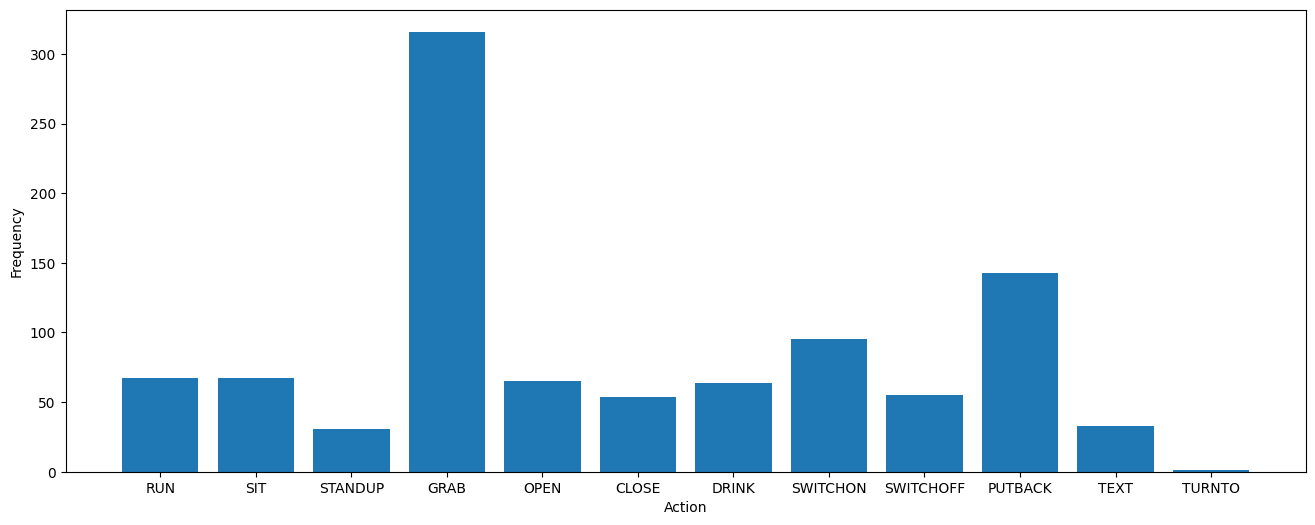

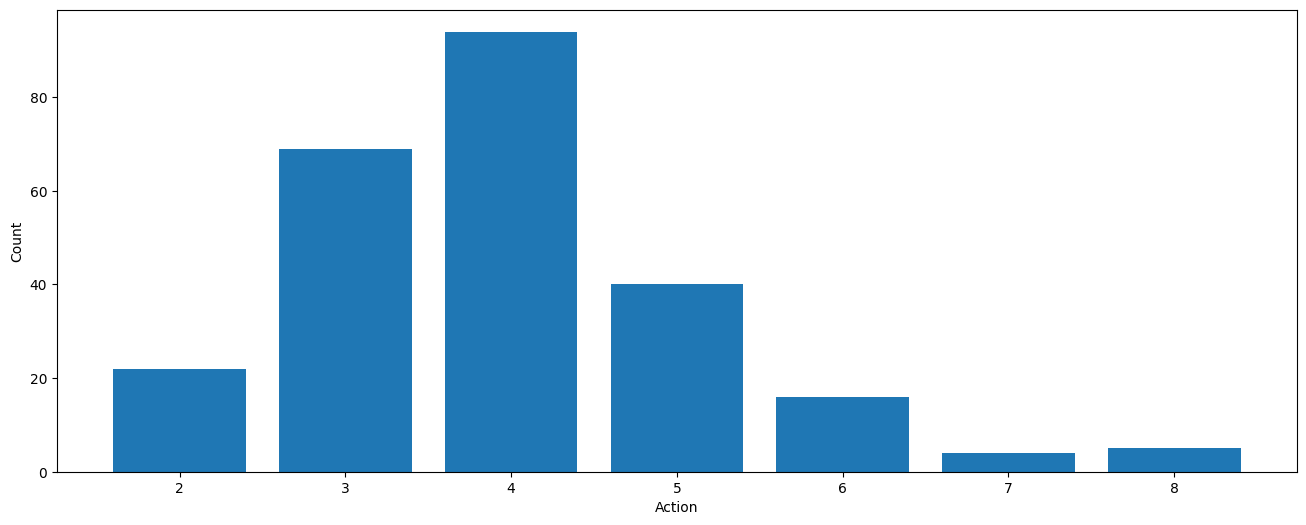

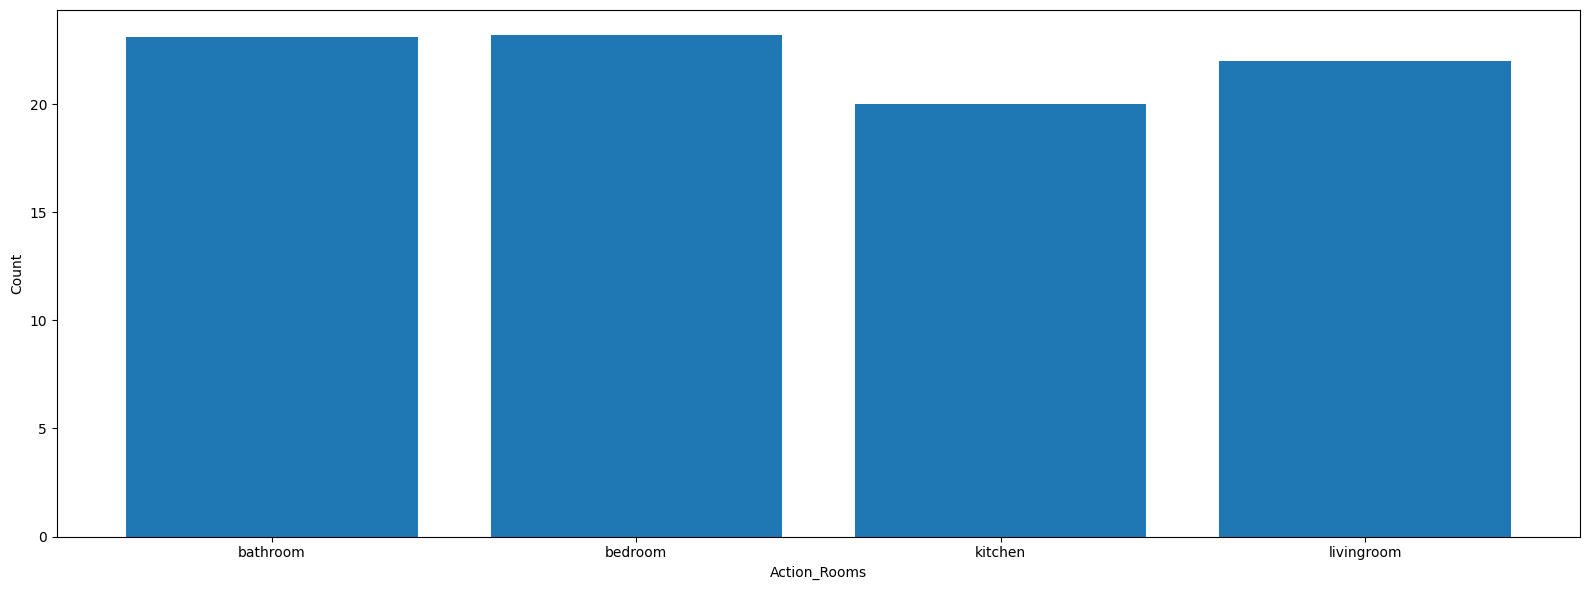

In [56]:
words=[]
Count=[]
output_image_path = r'C:\Users\ACSL\Desktop\JW\virtualhome-master\virtualhome-master\virtualhome\simulation\build_camera\Output\word_frequency_graph.png'
graph_path = r'C:\Users\ACSL\Desktop\JW\virtualhome-master\virtualhome-master\virtualhome\simulation\build_camera\Output\graphs'

json_files = glob.glob(f"{graph_path}\\graph_*.json")
json_contents = [json.load(open(file_path, 'r')) for file_path in json_files]
room_class_names = [
    obj.get('class_name')
    for json_content in json_contents
    for obj in json_content.get('nodes', [])
    if obj.get('category') == 'Rooms'
]


for i in range(0, 49, 2):
    for j in range(10):
        file_path =file_path = r'C:\Users\ACSL\Desktop\JW\virtualhome-master\virtualhome-master\virtualhome\simulation\build_camera\Output\{0}\script{1}\1\ftaa_script{1}.txt'.format(i, j)
        with open(file_path, 'r') as file:
          content = file.read()
          new_words = [word.strip() for word in content.split() if word.isalpha() and word!='WALK']
          words+=new_words
          Count.append(len(new_words))
    
word_counts = Counter(words)
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(word_counts.keys(), word_counts.values())
plt.xlabel('Action')
plt.ylabel('Frequency')
counts_action = Counter(Count)
fig, ax = plt.subplots(figsize=(16, 6))
plt.bar(counts_action.keys(), counts_action.values())
plt.xlabel('Action')
plt.ylabel('Count')
counts_room = Counter(room_class_names)
fig, ax = plt.subplots(figsize=(16, 6))
divided_values = [value / 10 for value in counts_room.values()]
plt.bar(counts_room.keys(), divided_values)
plt.xlabel('Action_Rooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()